In [54]:
using LinearAlgebra  #####Son las paqueterias que uso, para instalar una paqueteria basta colocar Pkg.add("Nombre_de_la_paqueteria")
using Plots
using SpecialFunctions: gamma
using Random, Distributions

In [55]:
function OUH(x0::Float64,γ::Float64,t::AbstractArray,Δt::Float64,Dt::Float64,cte::Float64=0.0) #Proceso de Ornstein–Uhlenbeck
    x=Vector{Float64}(undef, length(t)) #Definimos un vector lleno de basura para luego sobre escribir en el 
    x[1]=x0    #La primera entrada es la condicion inicial del Proceso de Ornstein–Uhlenbeck
    
    for i=1:length(t)                 #Usamos un for para poder hacer el proceso
        x0=x0-(x0*γ*Δt)+(sqrt(2*Dt*Δt)*randn())+cte # Es el proceso de Ornstein–Uhlenbeck que depende del paso anterior 
        @inbounds x[1+i]=x0                 #@inbounds ignora si la lista tiene el tamaño adecuado y sobreescribimos en la lista basura
    end
    return x                          # Devolvemos la caminata de Ornstein–Uhlenbeck
end

OUH (generic function with 2 methods)

In [56]:
function eigen2(n::Int64,Δt::Float64,K::Array{Float64,1}) #Obtenemos los eigenvalores y eigenvectores 
    R=diagm(0 =>ones(2))                                #Hacemos una matriz llena de unos en la diagonal de dimension 2
    for i=1:n                                           #Hacemos un for donde n es la cantidad de pasos de t, pasos de tiempo
       R=(diagm(0 => ones(2))+diagm(1 => [K[i]]*Δt,-1 => -[K[i]]*Δt)+(0.5*diagm(1 => [K[i]]*Δt,-1 => -[K[i]]*Δt)^2))*R #Hacemos los pasos de multiplicar la matriz por la matriz anterior 
    end
    eigen(R)#Obtenemos el eigenvalor y eigenvector
end

function eigen2(n::Int64,Δt::Float64,K::Array{Float64,1},T::Array{Float64,1}) 
    R=diagm(0 =>ones(3)) #Hacemos una matriz llena de unos en la diagonal de dimension 2
    for i=1:n            #Hacemos un for donde n es la cantidad de pasos de t, pasos de tiempo
       R=(diagm(0 => ones(3))+diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)+(0.5*diagm(1 => [K[i],T[i]]*Δt,-1 => -[K[i],T[i]]*Δt)^2))*R #Hacemos los pasos de multiplicar la matriz por la matriz anterior 
    end
    eigen(R) #Obtenemos el eigenvalor y eigenvector
end

eigen2 (generic function with 2 methods)

In [57]:
function lam_eigenvals(γ::Float64,Δt::Float64,t::AbstractArray,tiradas::Int64,Dt::Float64,k0::Float64,ctek::Float64=0.0) #Da una lista de eigenvalores de todas las tiradas
    λ=Vector{Complex{Float64}}(undef,2*tiradas) #Nos hace una lista llena de basura para renombrar sus valores
    for i=1:tiradas             #Un for con la cantidad de tiradas
        K=OUH(k0,γ,t,Δt,Dt,ctek)        #Usamos el proceso de Ornstein–Uhlenbeck para cada tirada
        a=eigen2(length(t),Δt,K).values #Obtenemos los eigenvalores de cada tirada
        @inbounds λ[2*i-1]=a[1] #Reescribirmos la basura con los eigenvalores
        @inbounds λ[2*i-0]=a[2] #Reescribirmos la basura con los eigenvalores
    end
    return λ   #Devolvemos la lista de eigenvalores
end

function lam_eigenvals(γ::Float64,Δt::Float64,t::AbstractArray,tiradas::Int64,Dt::Float64,k0::Float64,t0::Float64,ctek::Float64=0.0,ctet::Float64=0.0)
    λ=Vector{Complex{Float64}}(undef,3*tiradas) #Nos hace una lista llena de basura para renombrar sus valores
    for i=1:tiradas #Un for con la cantidad de tiradas
        K=OUH(k0,γ,t,Δt,Dt,ctek) #Usamos el proceso de Ornstein–Uhlenbeck para cada tirada
        T=OUH(t0,γ,t,Δt,Dt,ctet) #Usamos el proceso de Ornstein–Uhlenbeck para cada tirada
        a=eigen2(length(t),Δt,K,T).values #Obtenemos los eigenvalores de cada tirada
        @inbounds λ[3*i-2]=a[1] #Reescribirmos la basura con los eigenvalores
        @inbounds λ[3*i-1]=a[2] #Reescribirmos la basura con los eigenvalores
        @inbounds λ[3*i-0]=a[3] #Reescribirmos la basura con los eigenvalores
    end
    return λ
end

lam_eigenvals (generic function with 4 methods)

In [58]:
function lam_eigenvals_C(λ::Array{Complex{Float64},1})
    λr=Complex{Float64}[]
    for i=1:length(λ)
        if imag(λ[i]) != 0
            push!(λr,λ[i])
        end
    end
    return λr
end
function lam_eigenvals_R(λ::Array{Complex{Float64},1})
    λr=Float64[]
    for i=1:length(λ)
        if imag(λ[i]) == 0
            push!(λr,λ[i])
        end
    end
    return λr
end

lam_eigenvals_R (generic function with 1 method)

In [59]:
k0=0.0
t0=0.0
γ=0.0
Dt=0.0
Δt=0.001
N=6.0
t=0:Δt:N

ctek=0.01
ctet=0.01
#para animar
tiradas=500
step=60 
length(1:step:length(t))


101

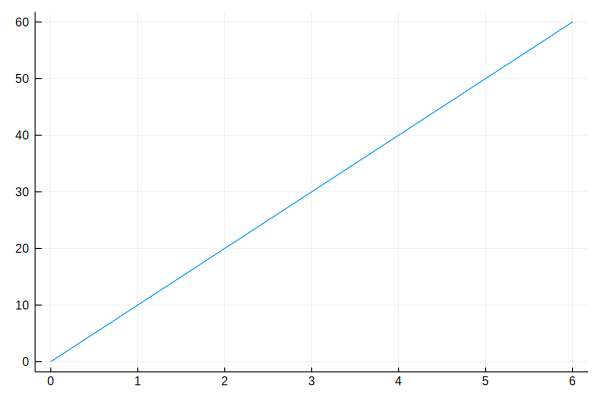

In [60]:

plot(t,OUH(k0,γ,t,Δt,Dt,ctek),legend=false)

In [61]:
@time λ_2=lam_eigenvals(γ,Δt,t,tiradas,Dt,k0,ctek);


 11.955048 seconds (189.25 M allocations: 9.045 GiB, 8.95% gc time)


In [62]:
@time λ_3=lam_eigenvals(γ,Δt,t,tiradas,Dt,k0,t0,ctek,ctet);

 11.719116 seconds (189.05 M allocations: 9.034 GiB, 9.04% gc time)


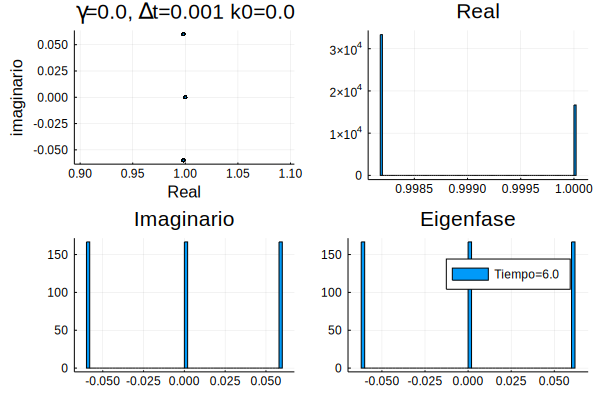

In [63]:
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ_2),imag(λ_2),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) k0=$(k0)")
Q2=histogram(real(λ_2),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ_2),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(angle.(λ_2),normalized=true,bins=60,label="Tiempo=$(N)",title="Eigenfase")
plot(Q1,Q2,Q3,Q4,layout=l)
#savefig("Eigenvalores_Completo_2D_gam=$(γ)_k0=$(k0).png")

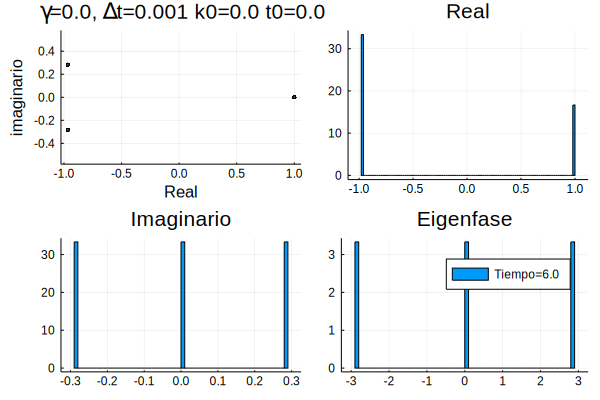

In [64]:

l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ_3),imag(λ_3),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) k0=$(k0) t0=$(t0)")
Q2=histogram(real(λ_3),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ_3),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(angle.(λ_3),normalized=true,bins=60,label="Tiempo=$(N)",title="Eigenfase")
plot(Q1,Q2,Q3,Q4,layout=l)
#savefig("Eigenvalores_Completo_3D_gam=$(γ)_k0=$(k0)_t0=$(t0).png")

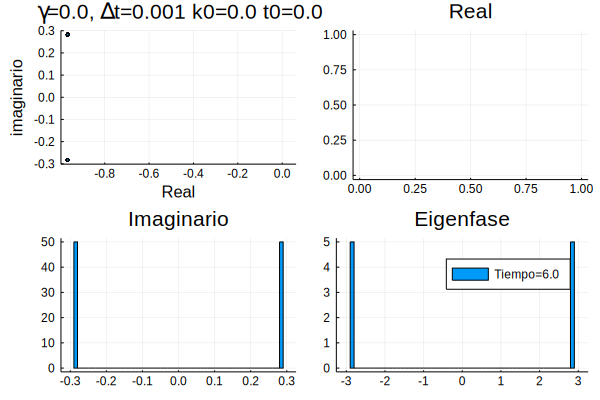

In [65]:
λ_3_C=lam_eigenvals_C(λ_3)
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ_3_C),imag(λ_3_C),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) k0=$(k0) t0=$(t0)")
Q2=histogram(real(λ_3_C),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ_3_C),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(angle.(λ_3_C),normalized=true,bins=60,label="Tiempo=$(N)",title="Eigenfase")
plot(Q1,Q2,Q3,Q4,layout=l)
#savefig("Eigenvalores_Completo_3D_Complejo_gam=$(γ)_k0=$(k0)_t0=$(t0).png")

In [66]:
λ_3_R=lam_eigenvals_R(λ_3)
l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
Q1=scatter(real(λ_3_R),imag(λ_3_R),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) k0=$(k0) t0=$(t0)")
Q2=histogram(real(λ_3_R),normalized=true,title="Real",legend=false,bins=100)
Q3=histogram(imag(λ_3_R),normalized=true,title="Imaginario",legend=false,bins=100)
Q4=histogram(angle.(λ_3_R),normalized=true,bins=60,label="Tiempo=$(N)",title="Eigenfase")
plot(Q1,Q2,Q3,Q4,layout=l)
savefig("Eigenvalores_Completo_3D_Reales_gam=$(γ)_k0=$(k0)_t0=$(t0).png")

614.157006 seconds (9.38 G allocations: 448.223 GiB, 9.98% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\tesis\Animacion_Prueba_2D_k0=0.0.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\tesis\\Animacion_Prueba_2D_k0=0.0.gif")
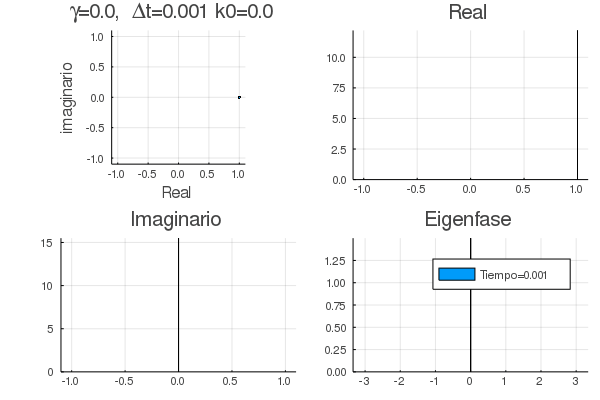

In [69]:
@time begin    
    anim= @animate for j=2:step:length(t)
        λ=lam_eigenvals(γ,Δt,t[1:j],tiradas,Dt,k0,ctek);
        l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
        Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100,xlims=(-1.1,1.1),ylims=(0,15.5))
        Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100,xlims=(-1.1,1.1),ylims=(0,12.2))
        Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) k0=$(k0)",xlims=(-1.1,1.1),ylims=(-1.1,1.1))
        #Q4=histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Norma",xlims=(1.000,1.0034))
        Q4=histogram(angle.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Eigenfase",xlims=(-(π+0.2),π+0.2),ylims=(0,1.5))
        plot(Q1,Q2,Q3,Q4,layout=l)
    end
    gif(anim,"./Animacion_Prueba_2D_k0=$(k0).gif", fps=60)
end

615.489395 seconds (9.37 G allocations: 448.035 GiB, 9.41% gc time)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\tesis\Animacion_Prueba_3D_gam=0.0_k0=0.0_t0=0.0_no_reals.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\tesis\\Animacion_Prueba_3D_gam=0.0_k0=0.0_t0=0.0_no_reals.gif")
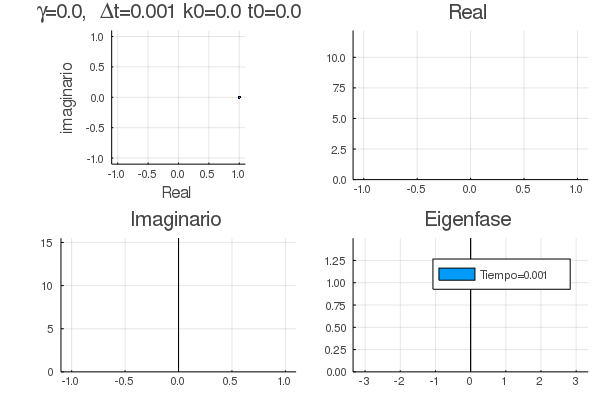

In [70]:
@time begin    
    anim= @animate for j=2:step:length(t)
        λ=lam_eigenvals_C(lam_eigenvals(γ,Δt,t[1:j],tiradas,Dt,k0,t0,ctek,ctet));
        l = @layout grid(2,2,heights=[0.5,0.5,0.5,0.5])
        Q3=histogram(imag(λ),normalized=true,title="Imaginario",legend=false,bins=100,xlims=(-1.1,1.1),ylims=(0,15.5))
        Q2=histogram(real(λ),normalized=true,title="Real",legend=false,bins=100,xlims=(-1.1,1.1),ylims=(0,12.2))
        Q1=scatter(real(λ),imag(λ),legend=false,aspect_ratio=:equal,markersize=1,xlabel="Real",ylabel="imaginario",title="\\gamma=$γ, \\Deltat=$(Δt) k0=$(k0) t0=$(t0)",xlims=(-1.1,1.1),ylims=(-1.1,1.1))
        #Q4=histogram(abs.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Norma",xlims=(1.000,1.0034))
        Q4=histogram(angle.(λ),normalized=true,bins=60,label="Tiempo=$(t[j])",title="Eigenfase",xlims=(-(π+0.2),π+0.2),ylims=(0,1.5))
        plot(Q1,Q2,Q3,Q4,layout=l)
    end
    gif(anim,"./Animacion_Prueba_3D_gam=$(γ)_k0=$(k0)_t0=$(t0)_no_reals.gif", fps=60)
end

In [129]:
an

3-element Array{Float64,1}:
 -2.3222827886191504
  2.3222827886191504
  0.0               

In [193]:
angle(cos(3*π/2)+im*sin(3*π/2))

-1.570796326794897

In [157]:
π/2

1.5707963267948966

-20.0:0.1:20.0

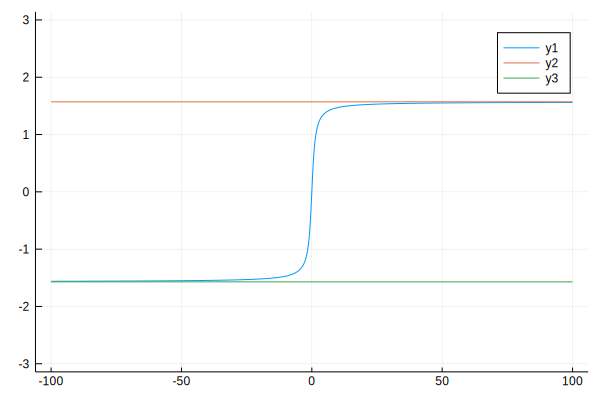

In [186]:
x=-100:0.1:100
plot(x,atan.(x),ylims=(-π,π))
plot!(x,ones(length(x))*π/2)
plot!(x,ones(length(x))*-π/2)

In [174]:
atan2(sin(3*π/2), cos(3*π/2))

UndefVarError: UndefVarError: atan2 not defined

In [173]:
methods(angle)

# 2 methods for generic function "angle":
[1] angle(z::Real) in Base at number.jl:194
[2] angle(z::Complex) in Base at complex.jl:557

In [35]:
Δt=0.001
K=0.5
T=0.5
(diagm(0 => ones(3))+diagm(1 => [K,T]*Δt,-1 => -[K,T]*Δt)+(0.5*diagm(1 => [K,T]*Δt,-1 => -[K,T]*Δt)^2))

3×3 Array{Float64,2}:
  1.0       0.0005  1.25e-7
 -0.0005    1.0     0.0005 
  1.25e-7  -0.0005  1.0    

In [93]:
exp(diagm(1 => [K,T]*Δt,-1 => -[K,T]*Δt))

3×3 Array{Float64,2}:
  1.0       0.0005  1.25e-7
 -0.0005    1.0     0.0005 
  1.25e-7  -0.0005  1.0    

In [95]:
angle.(λ_2)

1500-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0